**In this notebook we measure the speed of Honda vehicle as perceived by Toyota vehicle. Honda was leading after 511 seconds from the experiment. Toyota vehicle could see Honda vehicle and it has LEAD DISTANCE information known to us. Based on this, we reconstructed speed of Honda vehicle as seen by Toyota and compared with the actual speed of Honda vehicle**

In [16]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import strym
from strym import strymread
from strym import strymmap

From GPS routes we find that we are only interested in Toyota file 2020-07-08-15-15-54_2T3MWRFVXLW056972 and Honda file 2020-07-08-13-15-02_5FNYF6H05HB089022

In [32]:
toyota_dbcfile = '/home/ivory/VersionControl/Jmscslgroup/strym/examples/newToyotacode.dbc'
honda_dbcfile = "/home/ivory/VersionControl/Jmscslgroup/strym/examples/honda_pilot_touring_2017_can_generated.dbc"
folder = '/home/ivory/CyverseData/JmscslgroupData/PandaData/2020_07_08/'

toyota = "2020-07-08-15-15-54_2T3MWRFVXLW056972"
toyota_can_file = folder + toyota + "_CAN_Messages.csv"
toyota_gps_file = folder + toyota + "_GPS_Messages.csv"
toyota_dashcam_A = folder + toyota + "_dashcamA.mp4"
toyota_dashcam_B = folder + toyota + "_dashcamB.mp4"

honda = "2020-07-08-13-15-02_5FNYF6H05HB089022"
honda_can_file = folder + honda + "_CAN_Messages.csv"
honda_gps_file = folder + honda + "_GPS_Messages.csv"
honda_dashcam = folder + honda + "_dashcam.mp4"


In [124]:
r_toyota = strymread(csvfile=toyota_can_file, dbcfile=toyota_dbcfile)
r_honda = strymread(csvfile=honda_can_file, dbcfile=honda_dbcfile)
r_toyota.dataframe['Time'] = r_toyota.dataframe['Time'] - 7200

In [105]:
g_toyota = strymmap(toyota_gps_file)
g_honda = strymmap(honda_gps_file)

GPS signal first acquired at 2020-07-08 20:16:10:100000

Looking for [chromedriver 84.0.4147.30 linux64] driver in cache 
File found in cache by path [/home/ivory/.wdm/drivers/chromedriver/84.0.4147.30/linux64/chromedriver]
GPS signal first acquired at 2020-07-08 20:15:02:000000

Looking for [chromedriver 84.0.4147.30 linux64] driver in cache 
File found in cache by path [/home/ivory/.wdm/drivers/chromedriver/84.0.4147.30/linux64/chromedriver]


## Visualize Counts of each messages from both cars data

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/ivory/anaco

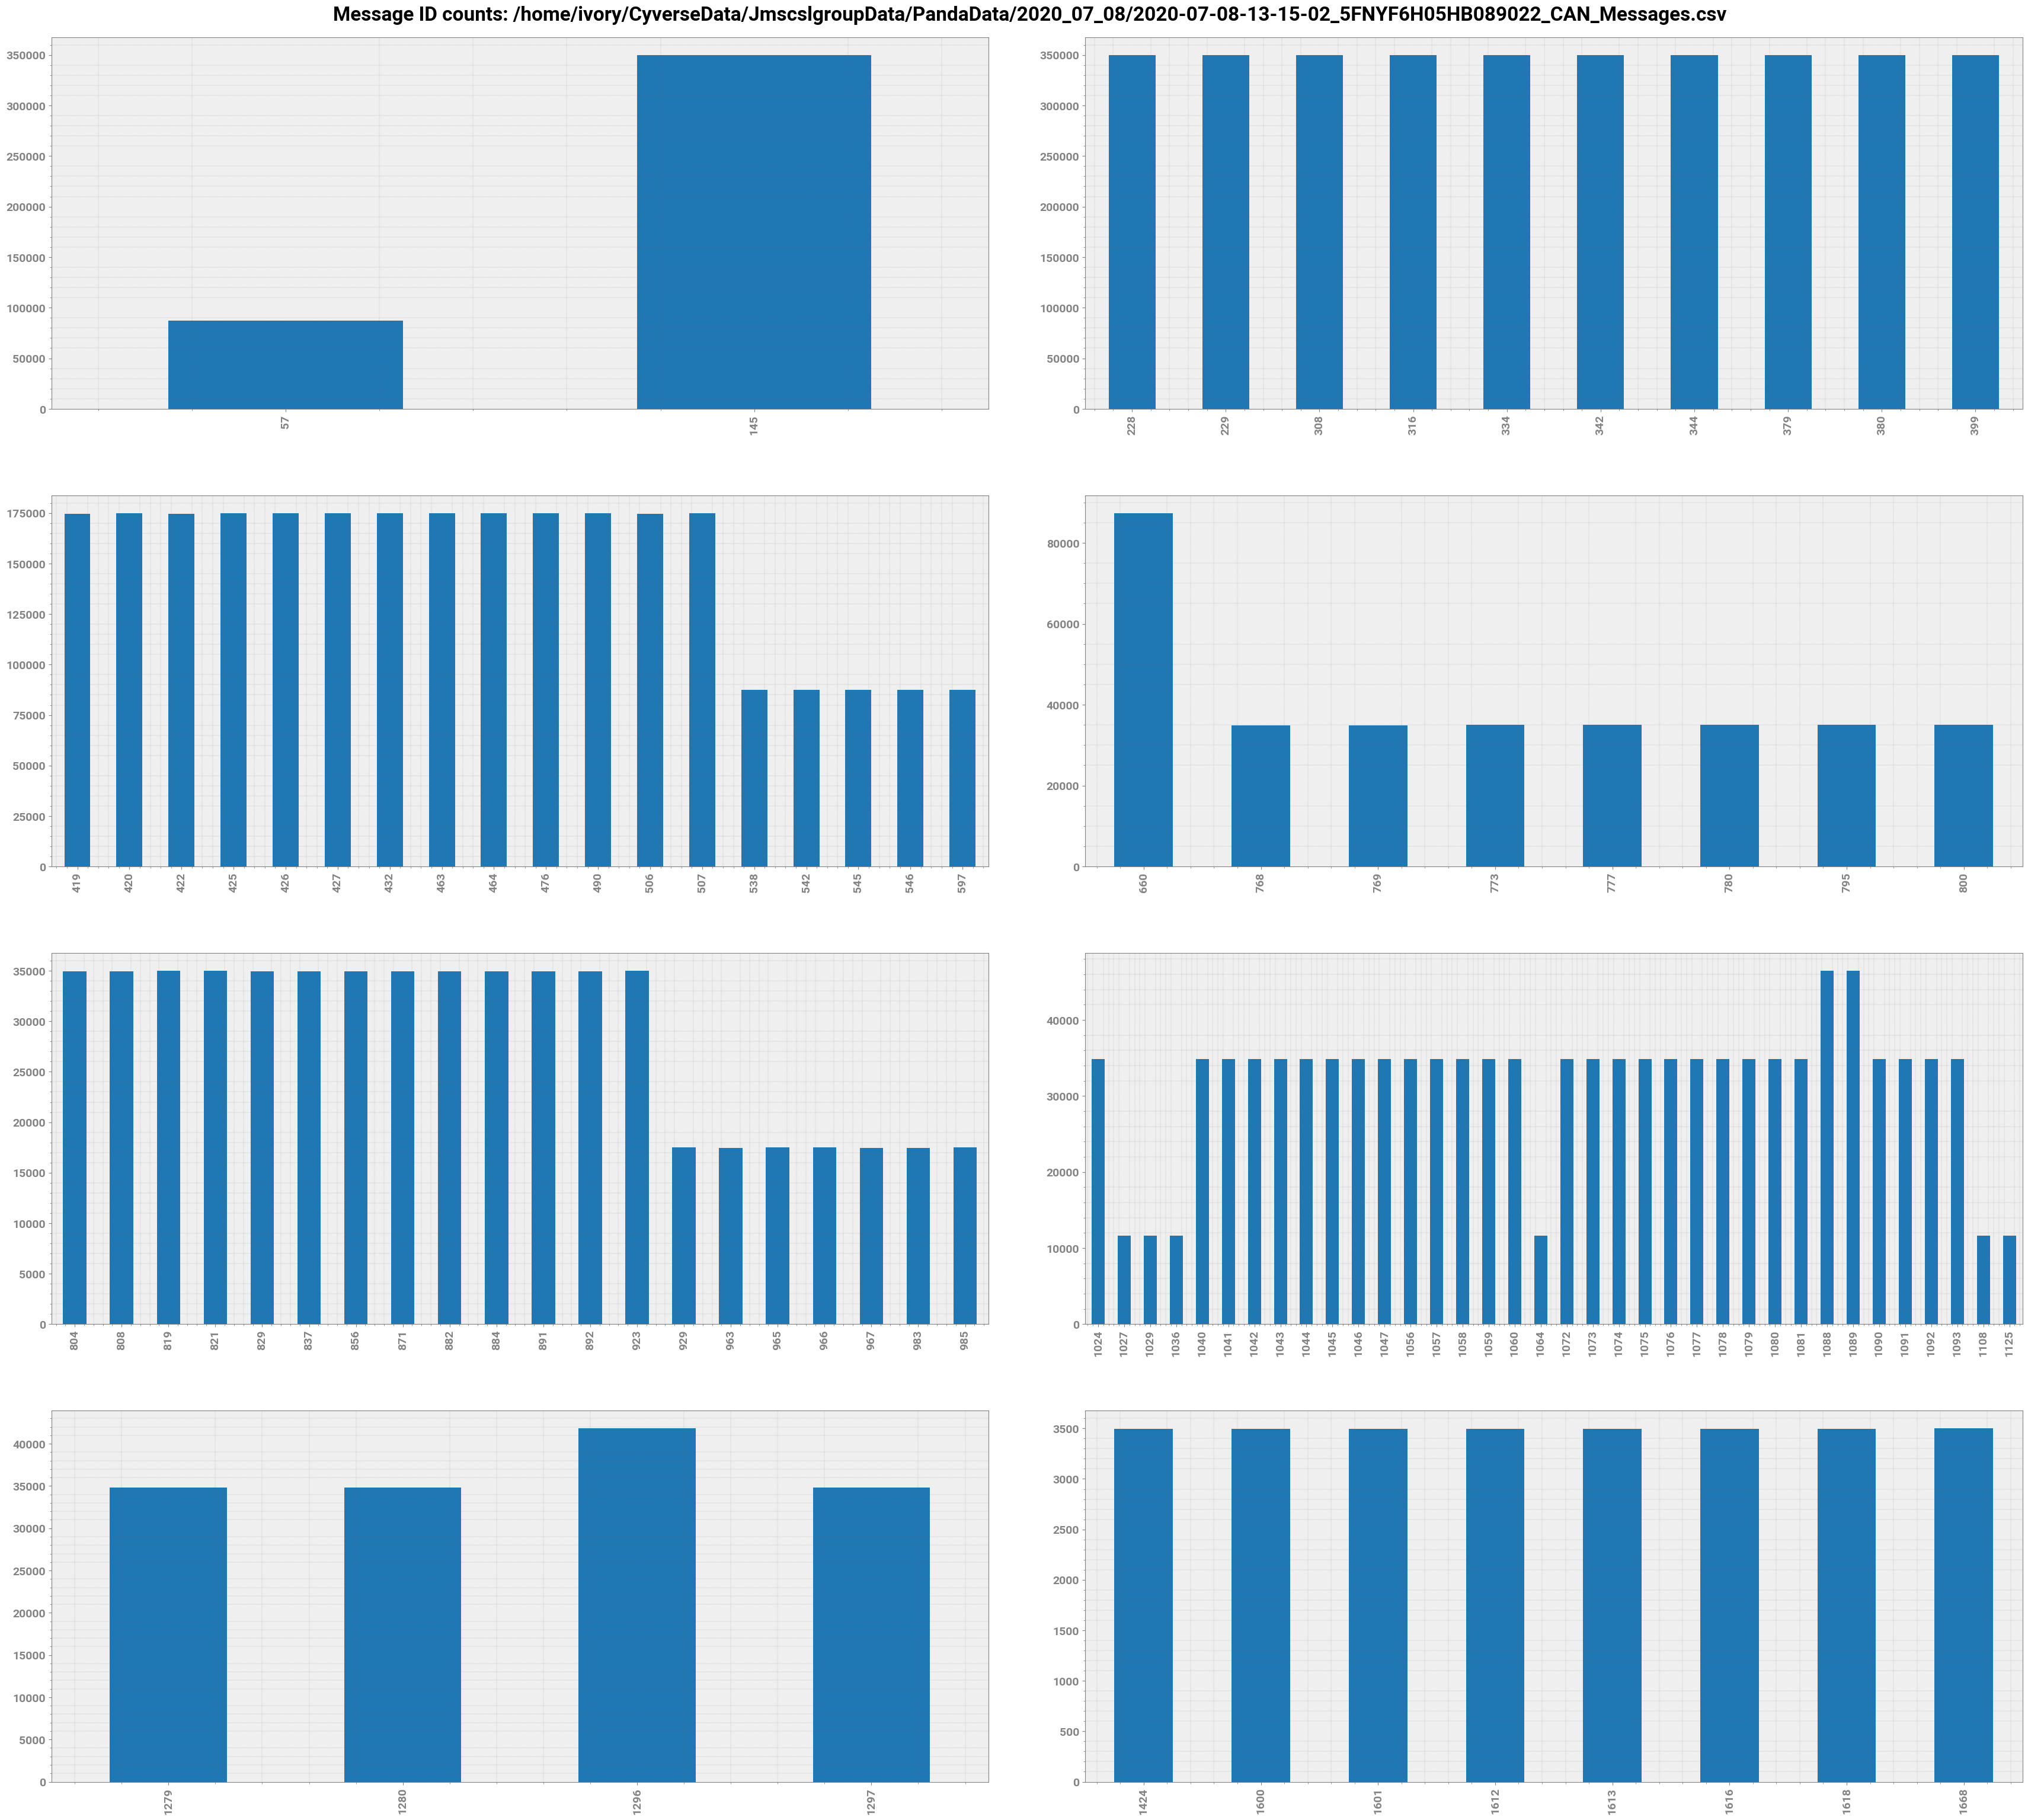

In [125]:
r_honda.count()

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/ivory/anaco

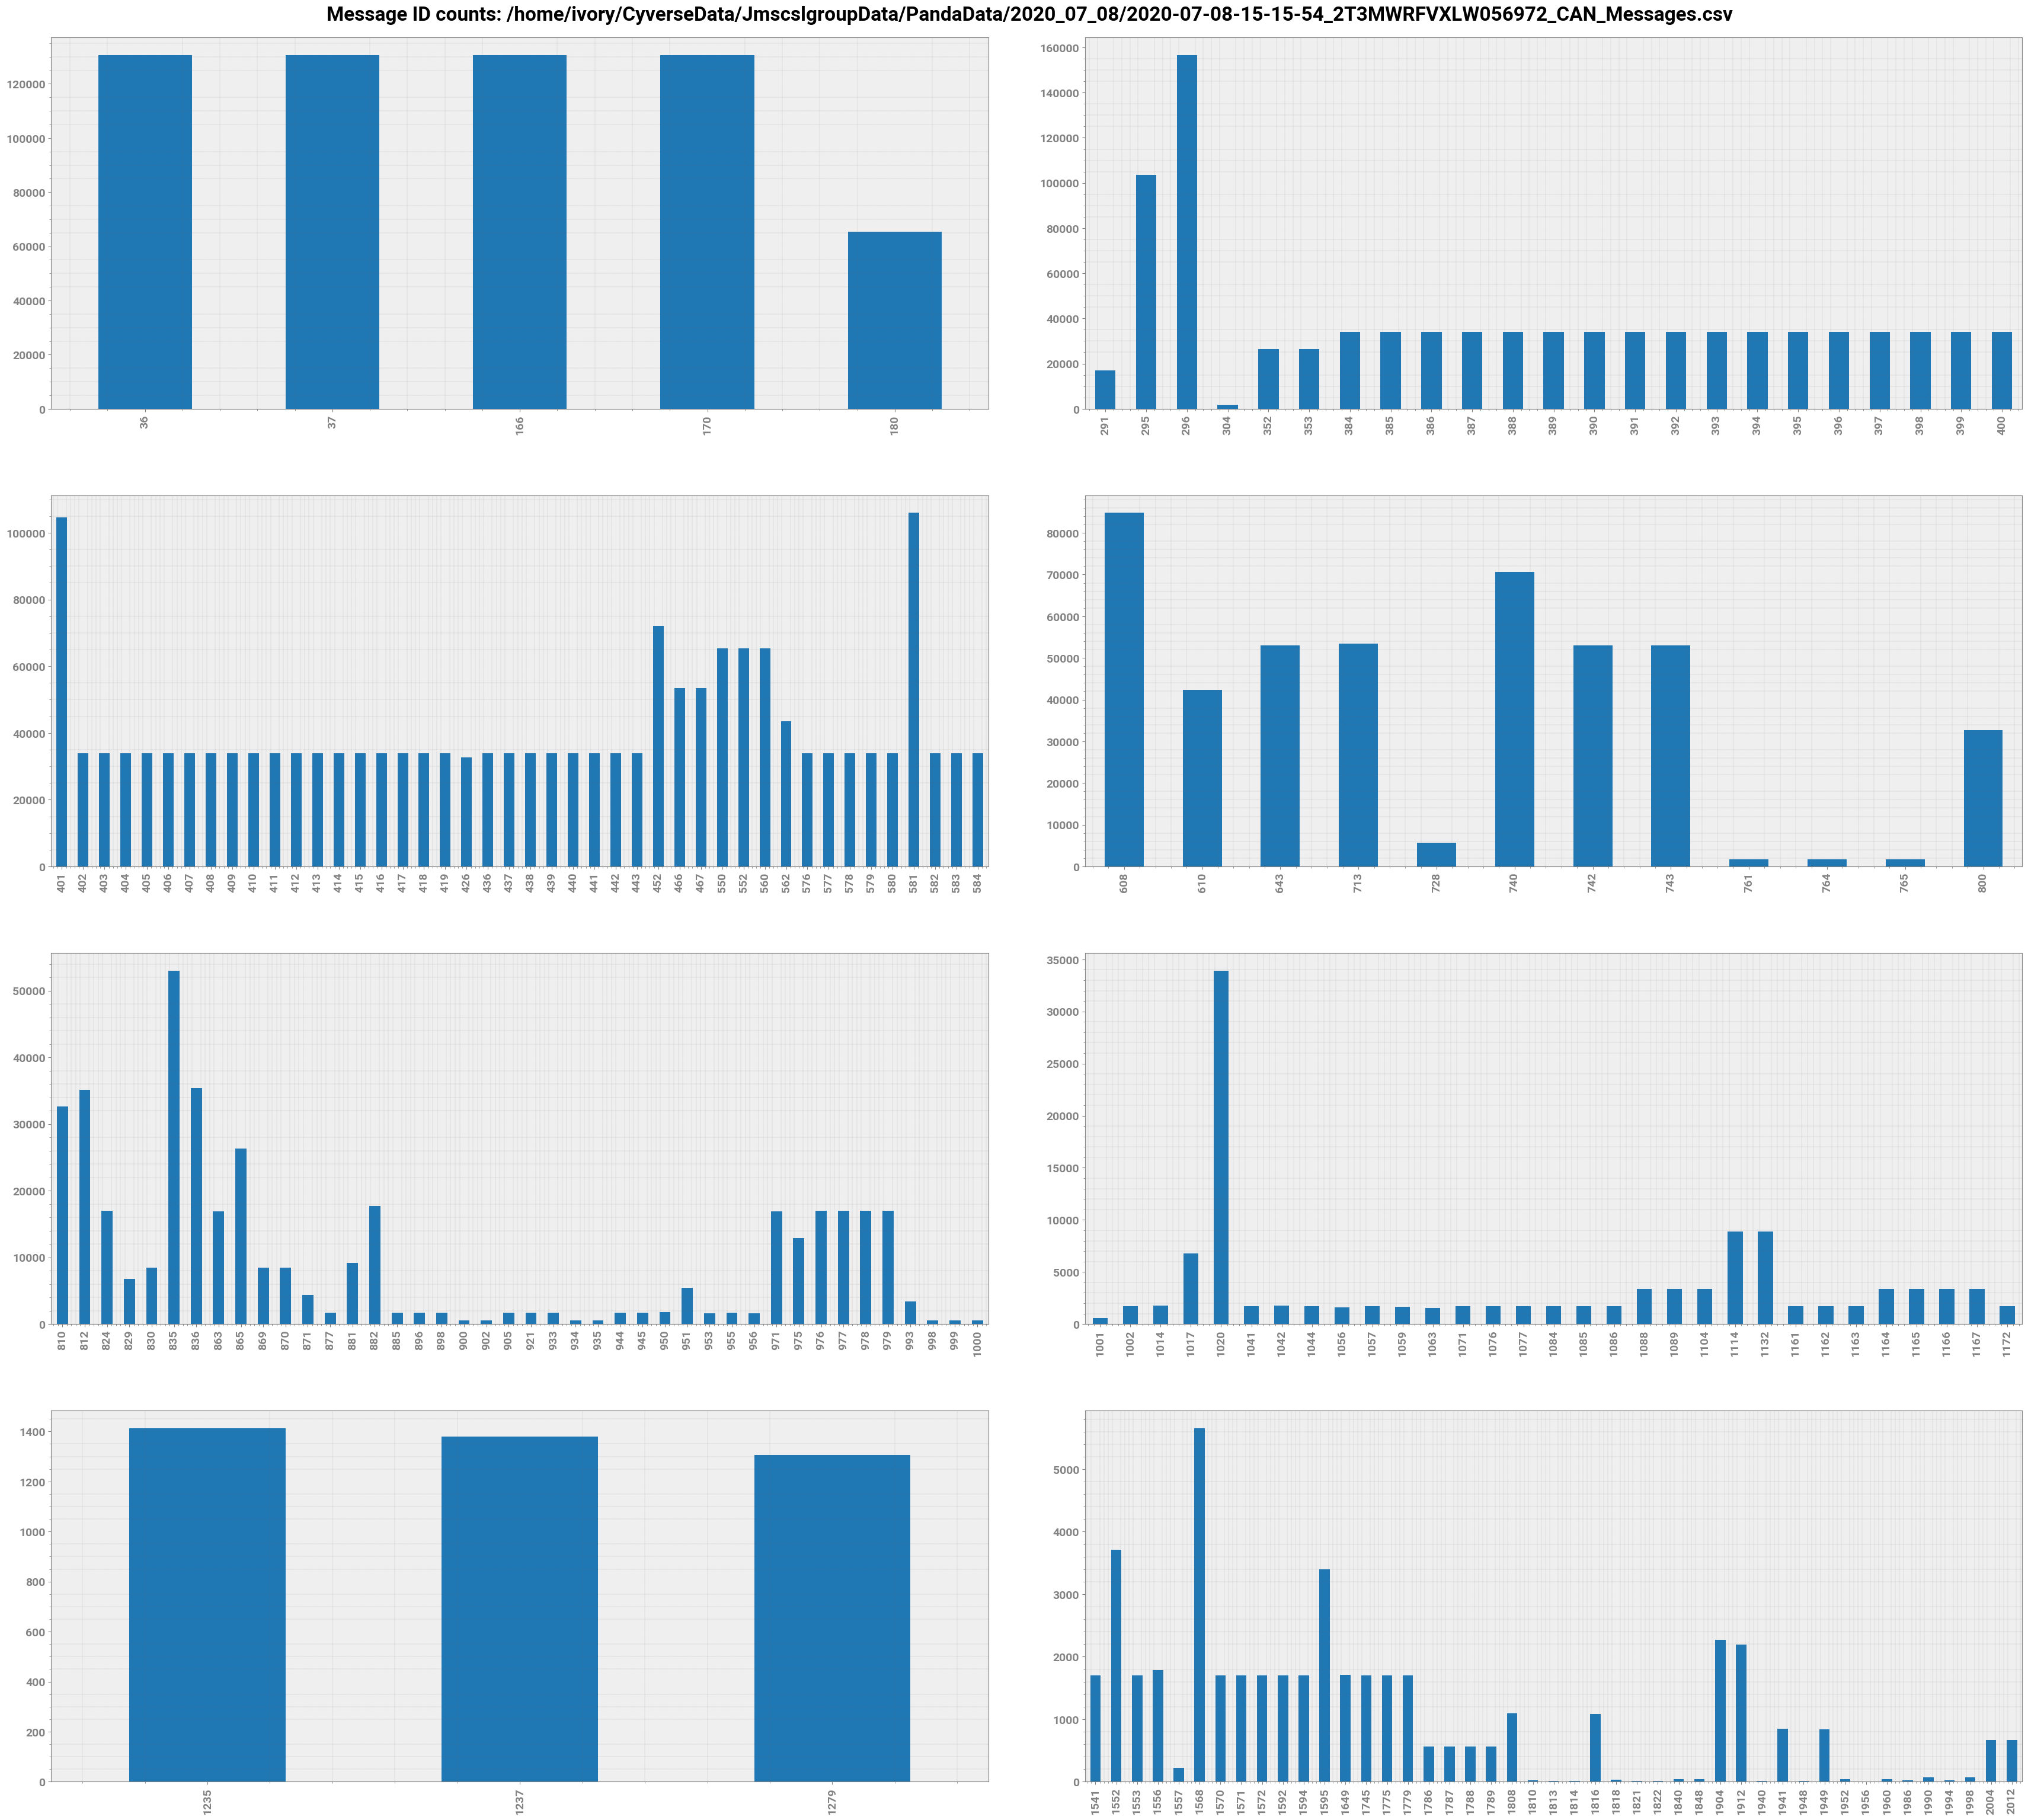

In [126]:
r_toyota.count()

In [127]:
toyota_speed = r_toyota.speed()
honda_speed = r_honda.get_ts(msg = "WHEEL_SPEEDS", signal="WHEEL_SPEED_FL")
toyota_speed['Message'] = toyota_speed['Message']*0.277778
honda_speed['Message'] = honda_speed['Message']*0.277778

## Let's look at all of the drive data

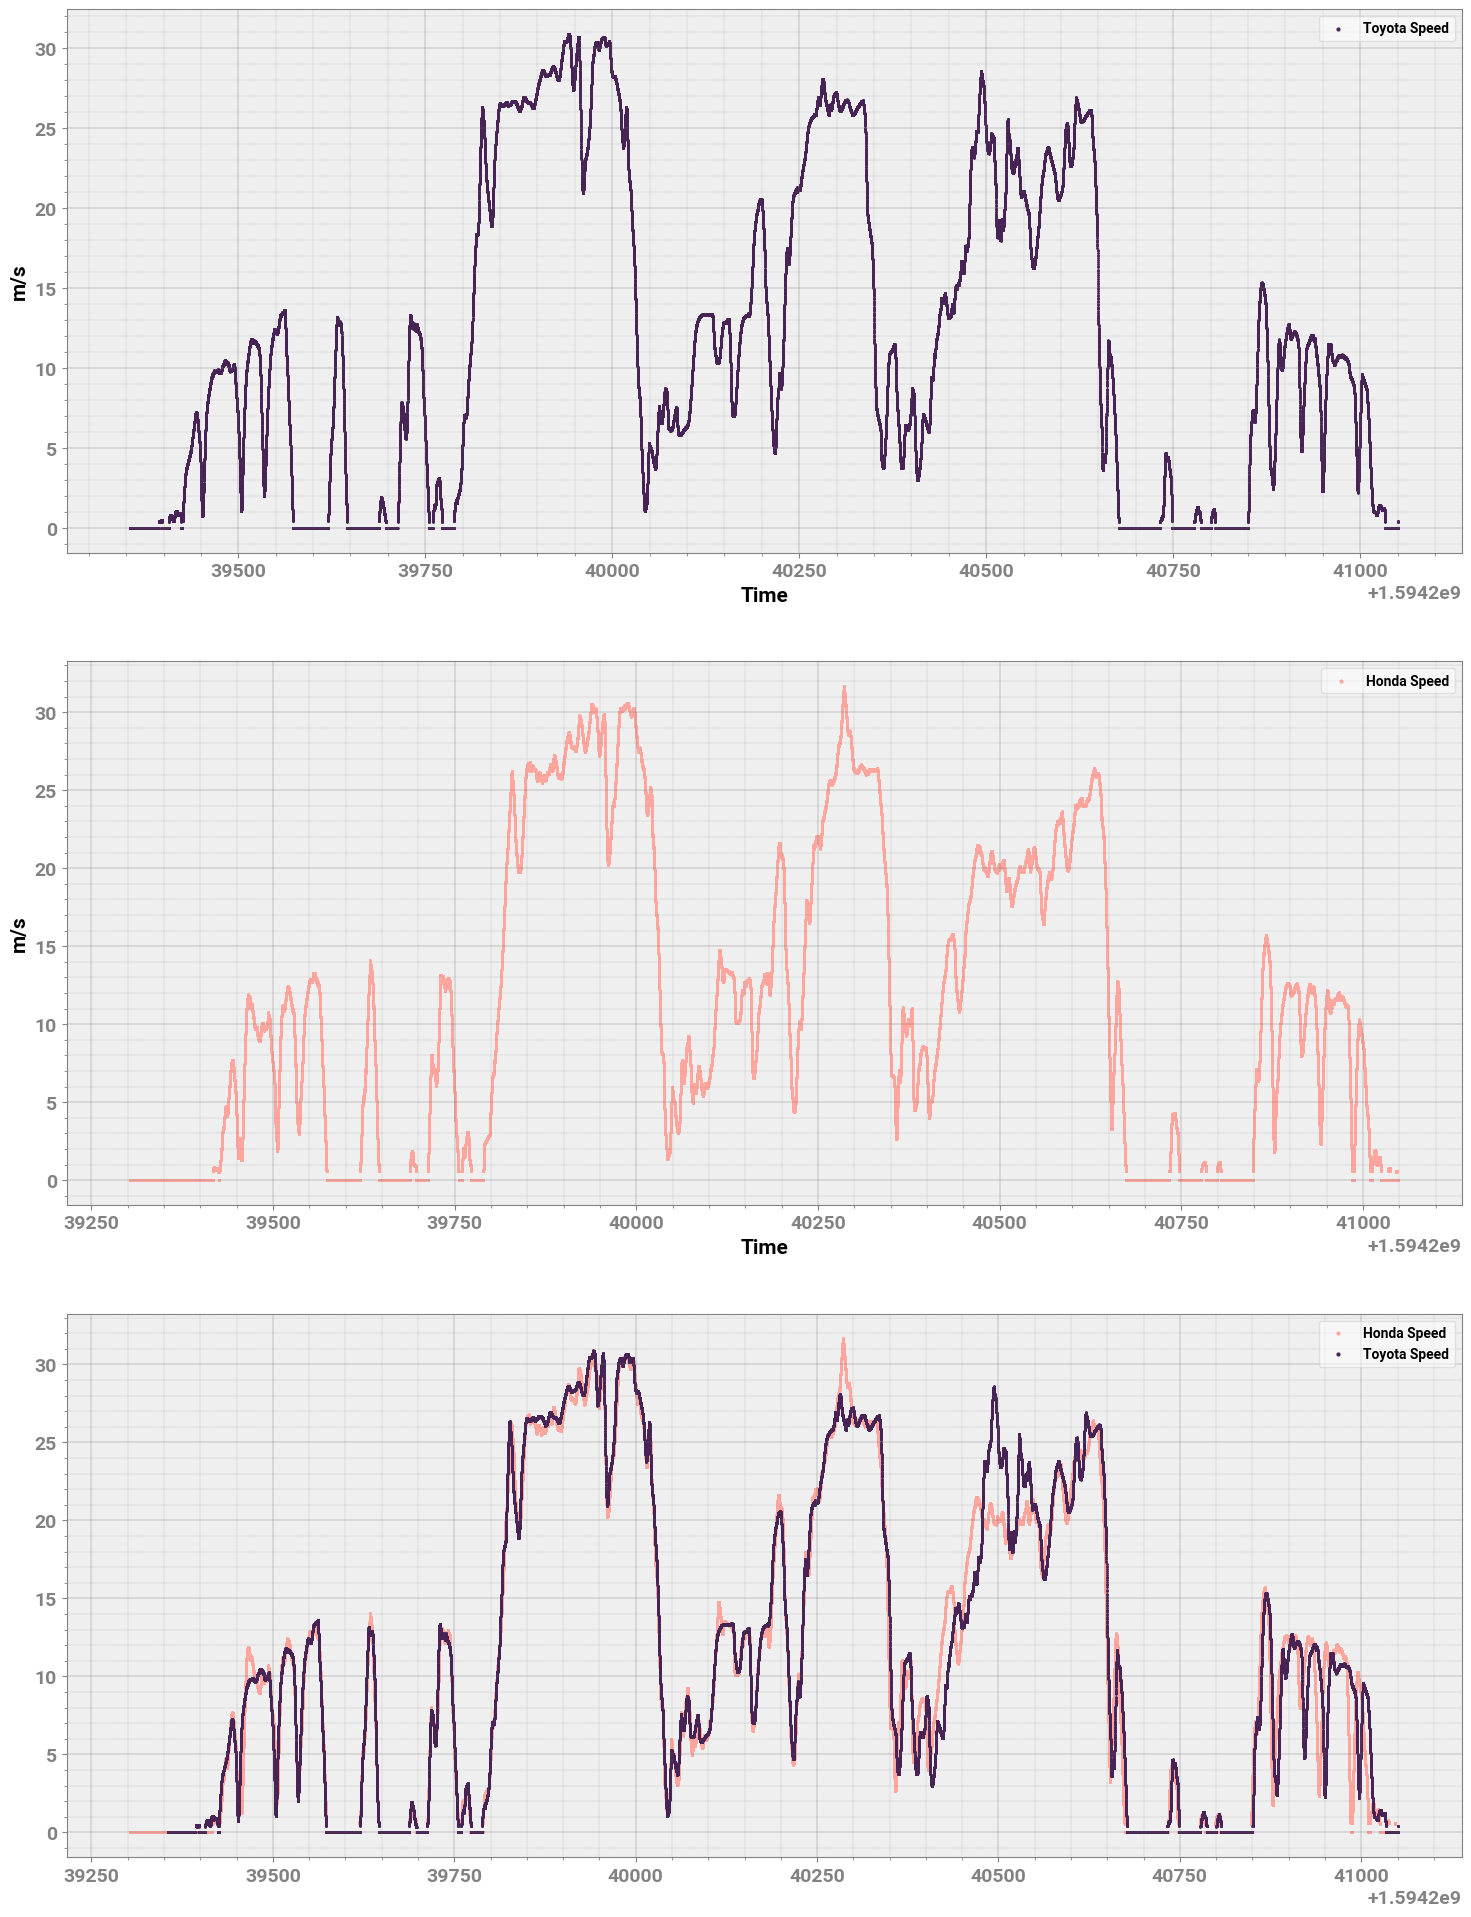

In [148]:
fig, ax = strym.create_fig(3)
ax[0].scatter(x = toyota_speed['Time'], y = toyota_speed['Message'], s = 1, color = "#462255")
ax[1].scatter(x = honda_speed['Time'], y = honda_speed['Message'], s = 1, color = "#FFA69E")
ax[2].scatter(x = honda_speed['Time'], y = honda_speed['Message'], s = 1, color = "#FFA69E")
ax[2].scatter(x = toyota_speed['Time'], y = toyota_speed['Message'], s = 1, color = "#462255")
ax[0].legend(["Toyota Speed"])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("m/s")
ax[1].legend(["Honda Speed"])
ax[1].set_xlabel("Time")
ax[1].set_ylabel("m/s")

ax[2].legend(["Honda Speed", "Toyota Speed"])

plt.show()

In [129]:
honda_lead

,Time,Message
Clock,,
2020-07-08 20:32:05.260061025,1.594240e+09,solid_car
2020-07-08 20:32:05.260061025,1.594240e+09,solid_car
2020-07-08 20:32:05.360378027,1.594240e+09,solid_car
2020-07-08 20:32:05.360378027,1.594240e+09,solid_car
2020-07-08 20:32:05.459939957,1.594240e+09,solid_car
...,...,...
2020-07-08 20:33:32.958384991,1.594240e+09,no_car
2020-07-08 20:33:33.058747053,1.594240e+09,no_car
2020-07-08 20:33:33.058747053,1.594240e+09,no_car


## Since Honda car started leading after 511 seconds into the experiment, we are gonna clip data before 511 seconds

In [130]:
honda_speed_lead = honda_speed[(honda_speed['Time'] - honda_speed['Time'].iloc[0] >= 511)]

In [131]:
honda_speed_lead

,Time,Message
Clock,,
2020-07-08 20:23:34.165871143,1.594240e+09,13.272233
2020-07-08 20:23:34.165871143,1.594240e+09,13.272233
2020-07-08 20:23:34.185199022,1.594240e+09,13.294455
2020-07-08 20:23:34.185371161,1.594240e+09,13.294455
2020-07-08 20:23:34.205318928,1.594240e+09,13.350011
...,...,...
2020-07-08 20:44:08.618475914,1.594241e+09,0.000000
2020-07-08 20:44:08.638876915,1.594241e+09,0.000000
2020-07-08 20:44:08.638876915,1.594241e+09,0.000000


In [132]:
toyota_speed_l = toyota_speed[(toyota_speed['Time'] - toyota_speed['Time'].iloc[0] >= 511)]

In [133]:
toyota_long_dist = r_toyota.long_dist(np.arange(0, 16))
toyota_lat_dist = r_toyota.lat_dist(np.arange(0, 16))
toyota_rel = r_toyota.rel_velocity(np.arange(0, 16))

In [134]:
toyota_long_dist = pd.concat(toyota_long_dist)
toyota_lat_dist = pd.concat(toyota_lat_dist)
toyota_rel = pd.concat(toyota_rel)

In [135]:
toyota_long_dist['Long'] = toyota_long_dist['Message']
toyota_long_dist['Lat'] = toyota_lat_dist['Message']
toyota_long_dist['Relvel'] = toyota_rel['Message']
toyota_long_dist.drop(columns=['Message'], inplace=True)

In [136]:
toyota_lead_state = toyota_long_dist
toyota_lead_state

,Time,Long,Lat,Relvel
Clock,,,,
2020-07-08 22:15:55.252307891,1.594239e+09,1.84,0.08,0.000
2020-07-08 22:15:55.257261992,1.594239e+09,1.84,0.08,0.000
2020-07-08 22:15:55.262037992,1.594239e+09,1.84,0.08,0.000
2020-07-08 22:15:55.266766071,1.594239e+09,1.84,0.08,0.000
2020-07-08 22:15:55.271398067,1.594239e+09,1.84,0.08,0.000
...,...,...,...,...
2020-07-08 22:44:10.787353039,1.594241e+09,18.48,-0.20,-0.475
2020-07-08 22:44:10.837707043,1.594241e+09,18.48,-0.20,-0.600
2020-07-08 22:44:10.886825085,1.594241e+09,18.44,-0.20,-0.625


In [159]:
toyota_lead_state = toyota_lead_state[np.abs(toyota_lead_state['Lat']) <= 0.5]

In [160]:
toyota_lead_state

,Time,Long,Lat,Relvel
Clock,,,,
2020-07-08 22:15:55.252307891,1.594239e+09,1.84,0.08,0.000
2020-07-08 22:15:55.257261992,1.594239e+09,1.84,0.08,0.000
2020-07-08 22:15:55.262037992,1.594239e+09,1.84,0.08,0.000
2020-07-08 22:15:55.266766071,1.594239e+09,1.84,0.08,0.000
2020-07-08 22:15:55.271398067,1.594239e+09,1.84,0.08,0.000
...,...,...,...,...
2020-07-08 22:44:10.787353039,1.594241e+09,18.48,-0.20,-0.475
2020-07-08 22:44:10.837707043,1.594241e+09,18.48,-0.20,-0.600
2020-07-08 22:44:10.886825085,1.594241e+09,18.44,-0.20,-0.625


In [169]:
lead_dist = r_toyota.get_ts(msg=869,signal="LEAD_DISTANCE")
lead_dist_l = lead_dist[(lead_dist['Time'] - lead_dist['Time'].iloc[0] >= 511)]

In [161]:
toyota_lead_state_l = toyota_lead_state[(toyota_lead_state['Time'] - toyota_lead_state['Time'].iloc[0] >= 511)]

In [162]:
lead_rel = pd.DataFrame()
lead_rel['Time'] = toyota_lead_state_l['Time']
lead_rel['Message'] = toyota_lead_state_l['Relvel']
toyota_speed_resampled, rel_resampled = strym.ts_sync(toyota_speed_l, lead_rel, rate="second")

In [163]:
lead_reoncstructed = pd.DataFrame()
lead_reoncstructed['Time'] = toyota_speed_resampled['Time']
lead_reoncstructed['Message'] = toyota_speed_resampled['Message'] - rel_resampled['Message']

In [164]:
honda_speed_lead['Time'][0]

1594239814.1658711

In [165]:
toyota_speed_l['Time'][0]

1594239866.2536

In [166]:
toyota_lead_state_l

,Time,Long,Lat,Relvel
Clock,,,,
2020-07-08 22:24:26.262164116,1.594240e+09,327.64,0.0,0.000
2020-07-08 22:24:26.312592030,1.594240e+09,327.64,0.0,0.000
2020-07-08 22:24:26.362139940,1.594240e+09,327.64,0.0,0.000
2020-07-08 22:24:26.412328005,1.594240e+09,327.64,0.0,0.000
2020-07-08 22:24:26.612746954,1.594240e+09,327.64,0.0,0.000
...,...,...,...,...
2020-07-08 22:44:10.787353039,1.594241e+09,18.48,-0.2,-0.475
2020-07-08 22:44:10.837707043,1.594241e+09,18.48,-0.2,-0.600
2020-07-08 22:44:10.886825085,1.594241e+09,18.44,-0.2,-0.625


## Now, look at the plot of estimated velocity  of Honda as perceived by Toyota.

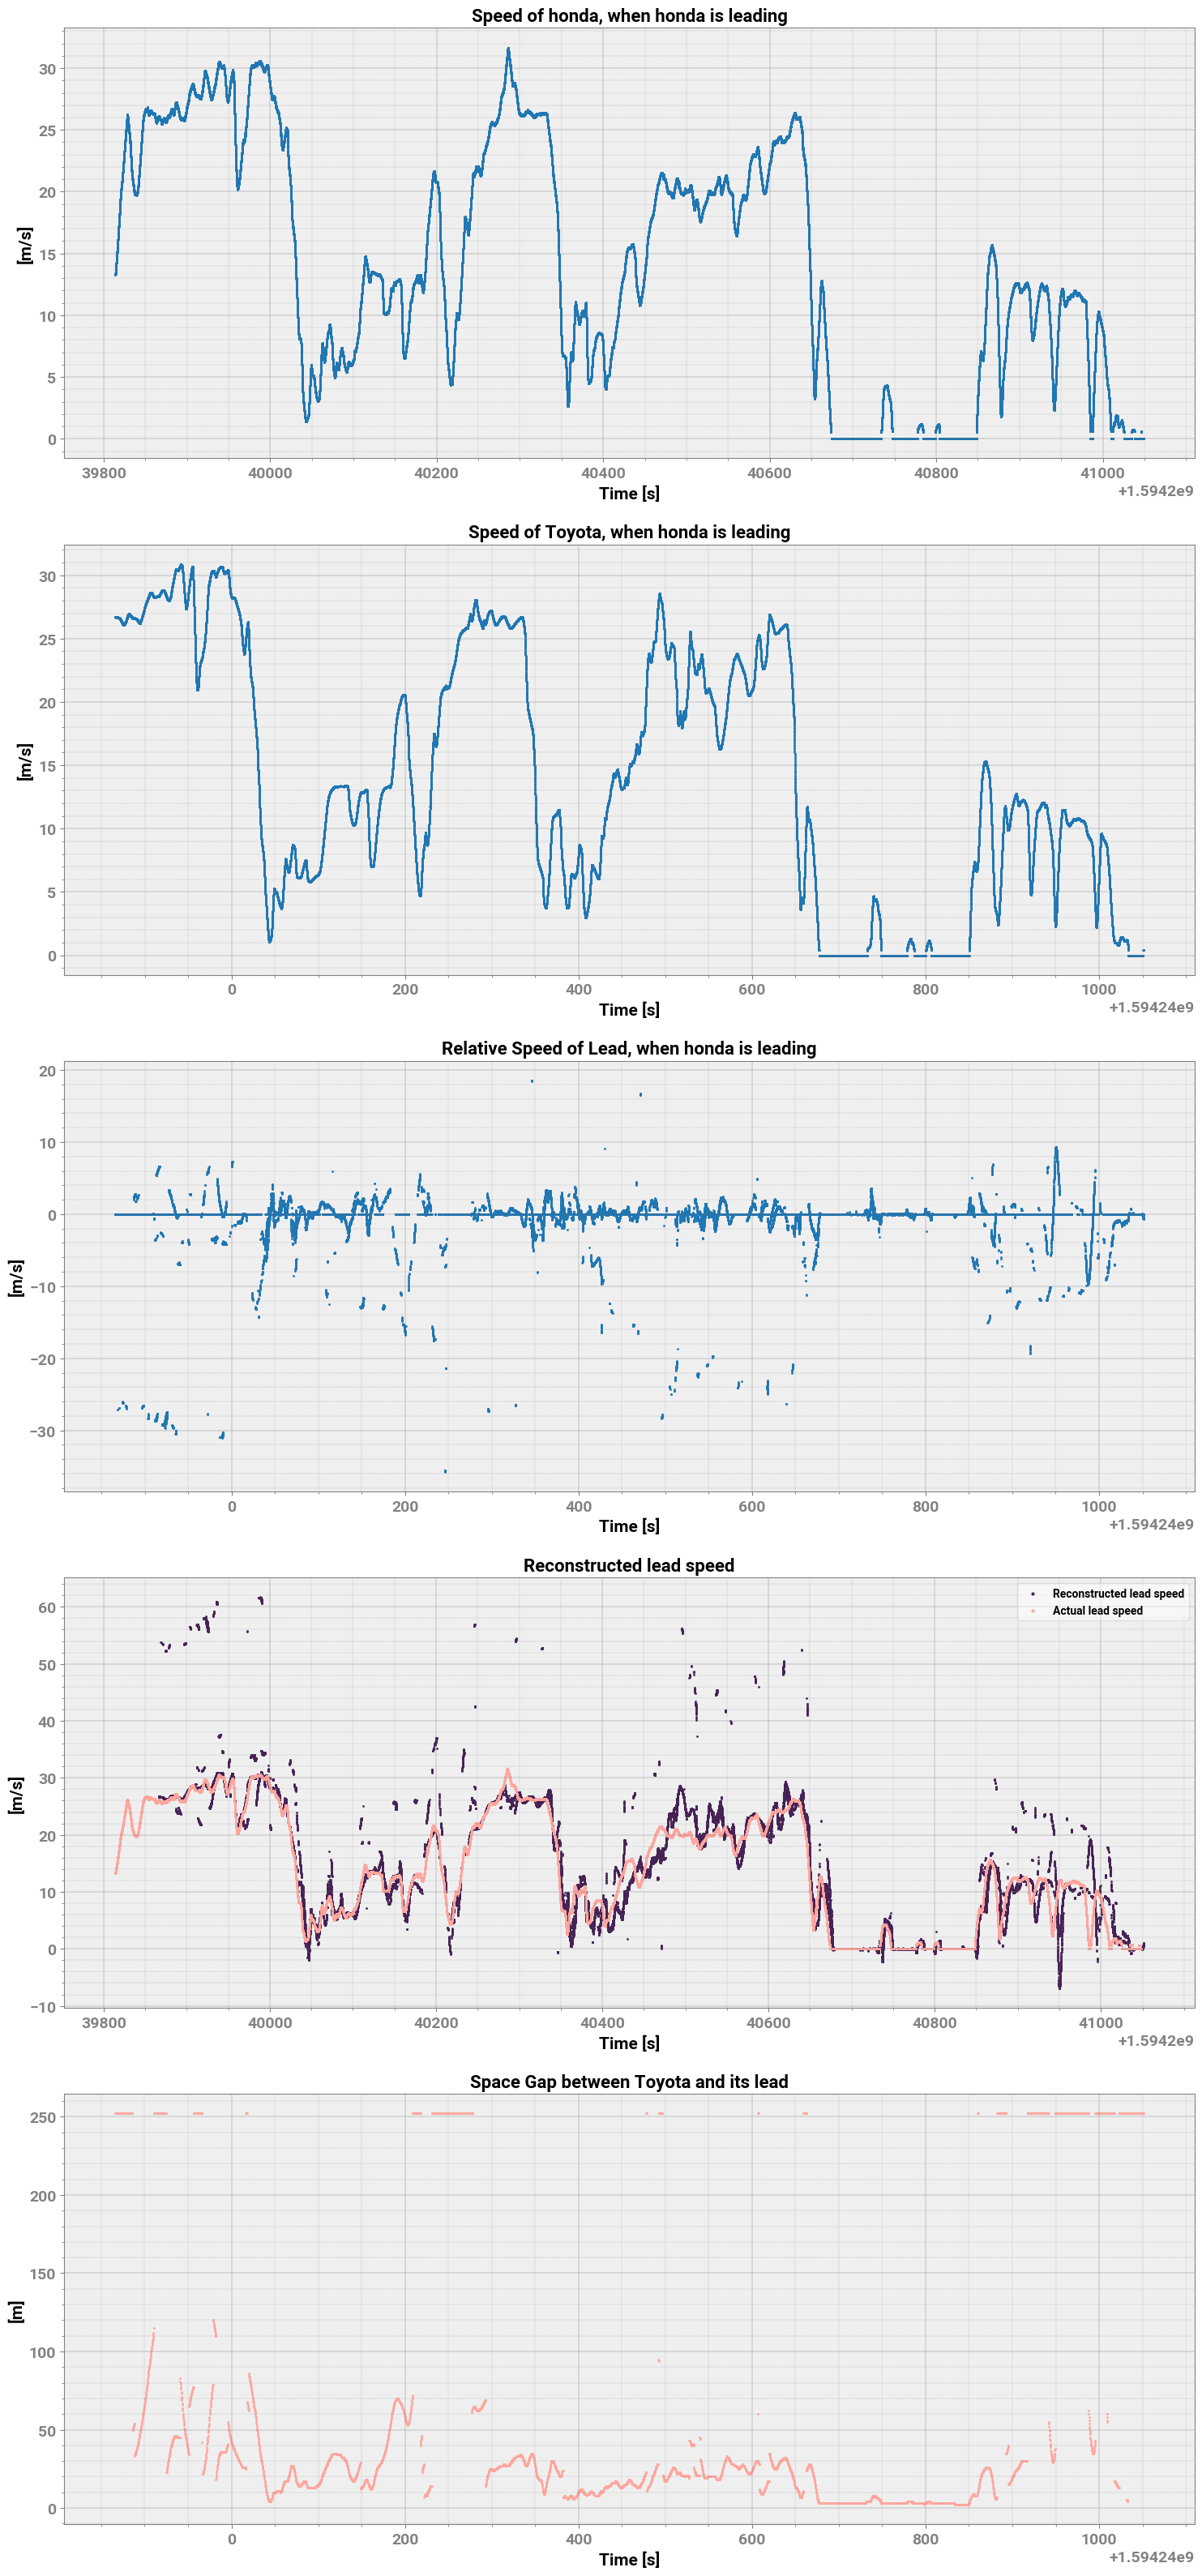

In [182]:
fig, ax = strym.create_fig(num_of_subplots=5)
ax[0].scatter(x = 'Time', y = 'Message', data = honda_speed_lead, s= 1)
ax[1].scatter(x = 'Time', y = 'Message', data = toyota_speed_l, s= 1)
ax[2].scatter(x = 'Time', y = 'Relvel', data = toyota_lead_state_l, s= 1)
ax[3].scatter(x = 'Time', y = 'Message', data = lead_reoncstructed, s= 1, color = "#462255")
ax[3].scatter(x = 'Time', y = 'Message', data = honda_speed_lead, s= 1, color = "#FFA69E")
ax[4].scatter(x = 'Time', y = 'Message', data = lead_dist_l, s= 1, color = "#FFA69E")
ax[0].set_title('Speed of honda, when honda is leading')
ax[1].set_title('Speed of Toyota, when honda is leading')
ax[2].set_title('Relative Speed of Lead, when honda is leading')
ax[3].set_title('Reconstructed lead speed')
ax[3].legend(["Reconstructed lead speed", "Actual lead speed"])
ax[4].set_title('Space Gap between Toyota and its lead')

ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[2].set_xlabel('Time [s]')
ax[3].set_xlabel('Time [s]')
ax[4].set_xlabel('Time [s]')

ax[0].set_ylabel('[m/s]')
ax[1].set_ylabel('[m/s]')
ax[2].set_ylabel('[m/s]')
ax[3].set_ylabel('[m/s]')
ax[4].set_ylabel('[m]')

plt.show()

## We can also denoise the estimated speed of Honda using moving average technique with window size 20.

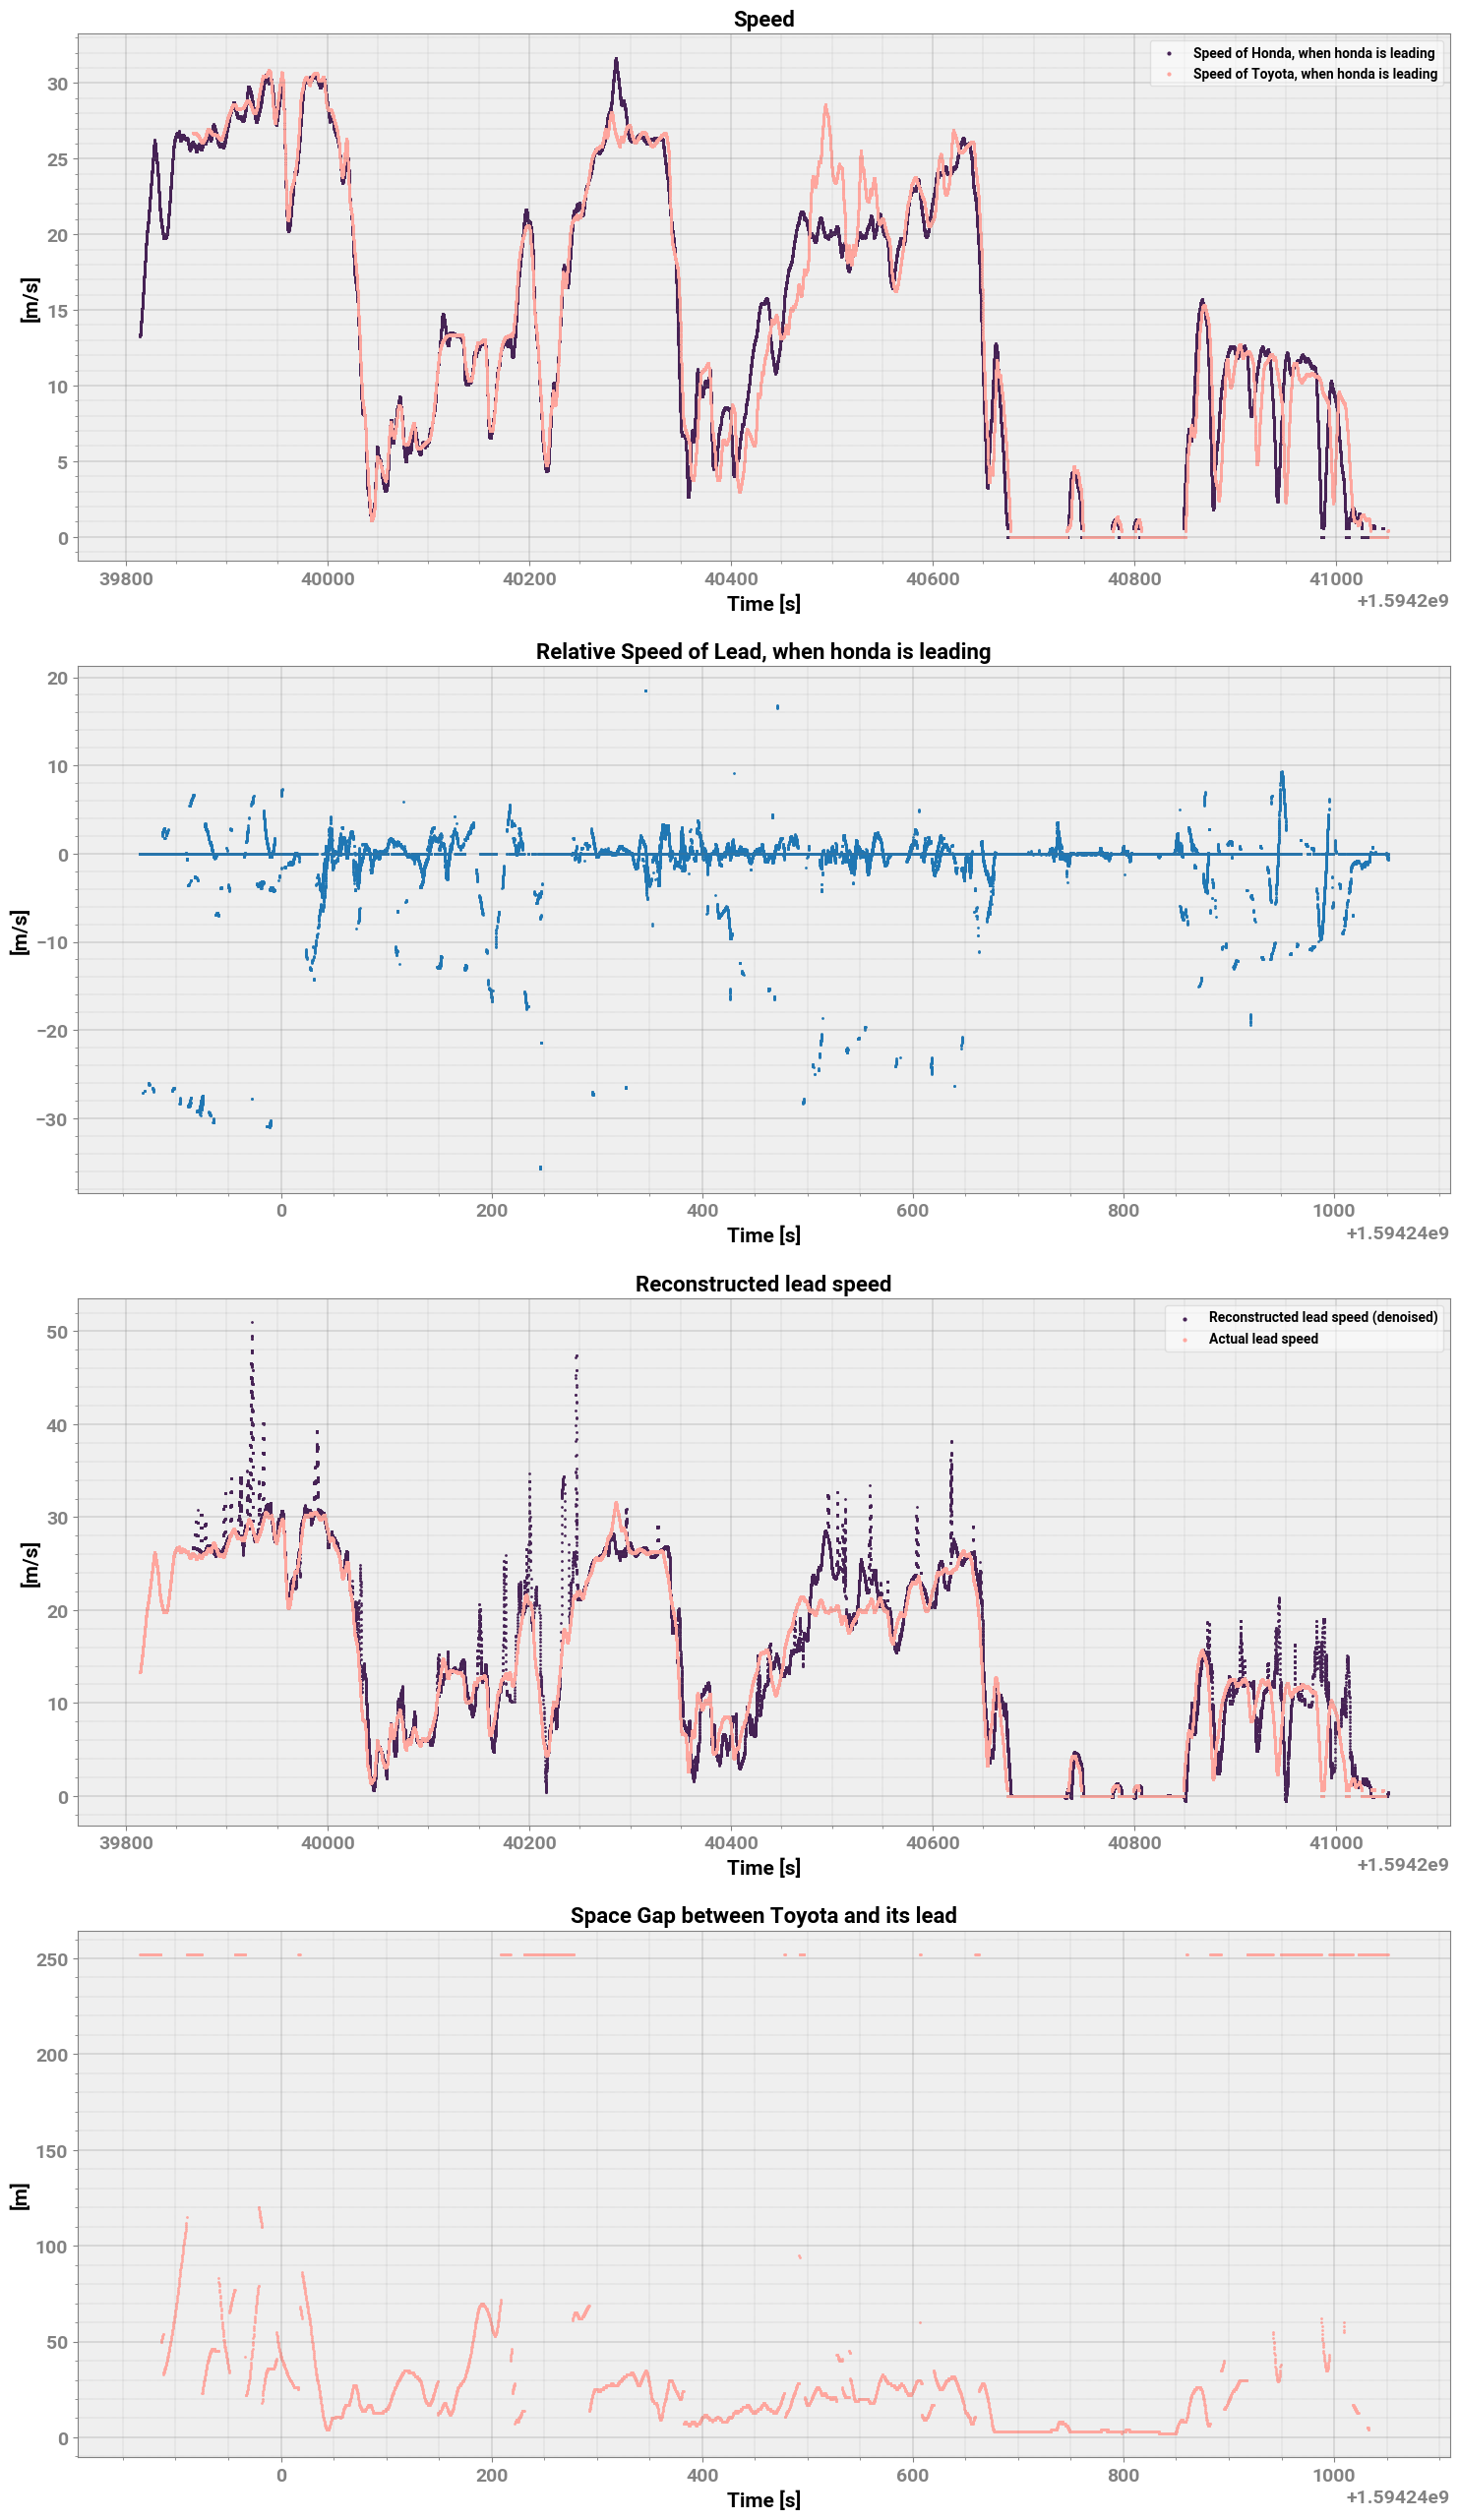

In [172]:
lead_reoncstructed_denoised = strym.denoise(lead_reoncstructed, window_size=20)
fig, ax = strym.create_fig(num_of_subplots=4)
ax[0].scatter(x = 'Time', y = 'Message', data = honda_speed_lead, s= 1, color = "#462255")
ax[0].scatter(x = 'Time', y = 'Message', data = toyota_speed_l, s= 1, color = "#FFA69E")
ax[1].scatter(x = 'Time', y = 'Relvel', data = toyota_lead_state_l, s= 1)
ax[2].scatter(x = 'Time', y = 'Message', data = lead_reoncstructed_denoised, s= 1, color = "#462255")
ax[2].scatter(x = 'Time', y = 'Message', data = honda_speed_lead, s= 1, color = "#FFA69E")
ax[3].scatter(x = 'Time', y = 'Message', data = lead_dist_l, s= 1, color = "#FFA69E")

ax[0].set_title('Speed')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[2].set_xlabel('Time [s]')
ax[3].set_xlabel('Time [s]')
ax[0].set_ylabel('[m/s]')
ax[1].set_ylabel('[m/s]')
ax[2].set_ylabel('[m/s]')
ax[3].set_ylabel('[m]')
ax[0].legend(['Speed of Honda, when honda is leading', 'Speed of Toyota, when honda is leading'])
ax[1].set_title('Relative Speed of Lead, when honda is leading')
ax[2].set_title('Reconstructed lead speed')
ax[2].legend(["Reconstructed lead speed (denoised)", "Actual lead speed"])
ax[3].set_title('Space Gap between Toyota and its lead')

plt.show()